### There are three ways to simulate Nonhomogeneous Poisson Process

### Thinning Method

In [1]:
'''
1. Find lmbda = max(lmbda(t)), let p(t) = lmbda(t)/lmbda
2. Generate homogeneous Poisson Process with lmdba
3. keep each one with probability lmbda(t1)/lmbda, lmbda(t2)/lmbda ....
'''

'\n1. Find lmbda = max(lmbda(t)), let p(t) = lmbda(t)/lmbda\n2. Generate homogeneous Poisson Process with lmdba\n3. keep each one with probability lmbda(t1)/lmbda, lmbda(t2)/lmbda ....\n'

example

In [2]:
#lmbda(t) = -(t-1)**2 + 2  0<= t <= 2

In [3]:
import matplotlib.pyplot as pt
import numpy as np
from scipy.optimize import minimize_scalar
from scipy.stats import poisson, uniform

In [4]:
def poisson_process(lmbda, T):
    N = poisson.rvs(lmbda * T)
    S = uniform.rvs(size = N) * T
    return np.sort(S)

In [5]:
def thinning(lmbda, lmbda_max, T):
    ts = poisson_process(lmbda_max,T)
    S = []
    for t in ts:
        p = lmbda(t) / lmbda_max
        if uniform.rvs() < p:
            S.append(t)
    return np.array(S)

In [6]:
def lmbda(t):
    return -(t - 1) ** 2 + 2
#because we want to find the max, we need to have a negative function
def neg_lmbda(t):
    return -1 * lmbda(t)
T = 2
sol = minimize_scalar(neg_lmbda, bounds = (0,T))
lmbda_max = lmbda(sol.x)

In [7]:
n = 10000
S = []
for i in range(0,n):
    S.append(thinning(lmbda,lmbda_max,T))

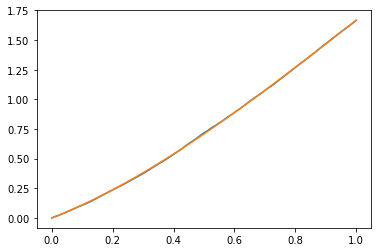

In [8]:
import matplotlib.pyplot as plt
ts = np.linspace(0.0,1,101)
means = np.zeros(101)
for j, t in enumerate (ts):
    for i in range(0,n):
        means[j] += np.sum(S[i]<=t)
means = means/n

y = -(ts ** 3)/ 3 + (ts ** 2) + ts
plt.plot(ts,means)
plt.plot(ts,y)

### Ordered Statistic

In [9]:
'''
1.Calculate Lambda(t), which is the ingegral of lmbda(t)
2.Generate N(T) from NPP(Lmbda(T))
3.Generate X1,.... XN(T) FROM DISTIRBUTION lmbda(t)/Lmbda(T)
    you can use inverse transform
    and 
    you can use rejection sampling
4.return sorted X
'''

'\n1.Calculate Lambda(t), which is the ingegral of lmbda(t)\n2.Generate N(T) from NPP(Lmbda(T))\n3.Generate X1,.... XN(T) FROM DISTIRBUTION lmbda(t)/Lmbda(T)\n    you can use inverse transform\n    and \n    you can use rejection sampling\n4.return sorted X\n'

#### example using inverse transform

In [10]:
def lmbda(t):
    return 42 * t * np.exp(-t**2)
def Lmbda(t):
    return 21 - 21 * np.exp(-t**2)
def N_arrivals(T):
    L = Lmbda(T)
    return poisson.rvs(L)
def inv_cdf(u,T):
    term1 = 1 - np.exp(-T**2)
    return np.sqrt(-np.log(1-u*term1))


In [11]:
def Simulate(T):
    N = N_arrivals(T)
    X = np.zeros(N)
    for i in range(N):
        u = uniform.rvs()
        X[i] = inv_cdf(u,T)
    return np.sort(X)
    
result = Simulate(6)
result

array([0.39762166, 0.40515032, 0.42367138, 0.7349404 , 0.74335833,
       0.84337234, 0.91454118, 0.9363072 , 0.97394043, 1.00145068,
       1.0613223 , 1.10748964, 1.415145  , 2.09577987])

In [12]:
from pynverse import inversefunc

In [13]:
from pynverse import inversefunc
def Lmbda(t):
    return 21 - 21 * np.exp(-t**2)

def cdf(t):
    return Lmbda(t)/Lmbda(6)

cdf_inv = inversefunc(cdf,domain = [0,6], open_domain = [False, False])

def sample_q2_itm():
    arrival_count = poisson.rvs(Lmbda(2))
    return np.sort([cdf_inv(u) for u in uniform.rvs(size = arrival_count)])

In [14]:
sample_q2_itm()

array([0.30509888, 0.33982721, 0.39700447, 0.45704798, 0.5441861 ,
       0.54669252, 0.55464306, 0.55675134, 0.60103787, 0.62156051,
       0.67313328, 0.7242339 , 0.78103499, 0.98338495, 0.98675755,
       1.03258509, 1.04902847, 1.14060581, 1.20870101, 1.34157688,
       1.40208499])

#### example using rejection sampling

In [15]:
from pynverse import inversefunc

In [16]:
T = 2

from scipy.optimize import minimize_scalar
def pdf(t):
    return (1 + t/2 -t**2/3 + t**3/40)/(T + T**2 / 4 - T**3 / 9 +  T**4/ 160)
def q(t):
    return 1/2
def m_pdf(t):
    return -pdf(t)/q(t)
#We can use uniform distribution on (0,2) as our proposal
sol = minimize_scalar(m_pdf, bounds = (0, T))
c = 2 * pdf(sol.x) 
print('c:{}'.format(c))
deno = T + T**2 / 4 - T**3 / 9 +  T**4/ 160



def rejection_sampling():
    X = poisson.rvs(deno)
    S = []
    for i in range(X):
        Y = 2 * uniform.rvs() 
        while uniform.rvs() > pdf(Y)*2/c:
            Y = 2 * uniform.rvs()
        S.append(Y)
    return np.array(sorted(S))

c:1.085123125735553


Or simply use inverse transform

In [17]:
from pynverse import inversefunc
def Lmbda(t):
    return t + t**2/4 - t**3/9 + t**4/160

def cdf(t):
    return Lmbda(t)/Lmbda(2)

cdf_inv = inversefunc(cdf)

def sample_q2_itm():
    arrival_count = poisson.rvs(Lmbda(2))
    return np.sort([cdf_inv(u) for u in uniform.rvs(size = arrival_count)])

In [18]:
sample_q2_itm()

array([0.32183351, 1.11795433])

### Inversion Method

In [19]:
'''
1 Find the inverse function for Lambda(t)
2 Generate arrival time for PP(1) FROM  0<= t <= Lambda(T)
3.return Lambda-1(s1),.....
'''

'\n1 Find the inverse function for Lambda(t)\n2 Generate arrival time for PP(1) FROM  0<= t <= Lambda(T)\n3.return Lambda-1(s1),.....\n'

In [20]:
from pynverse import inversefunc
def poisson_process(lmbda,T):
    N = poisson.rvs(lmbda * T)
    S = uniform.rvs(size = N) * T
    return np.sort(S)

def Lmbda(t):
    return 250 / np.pi * (1 - np.cos(np.pi * t / 10))

def inv(t):
    inv_1 = inversefunc(Lmbda, domain = [0,10], open_domain = [False, False])
    return inv_1(t)

def inv_method(Lmbda,t):
    Lambdat = Lmbda(t)
    S = poisson_process(1,Lambdat)
    return np.sort(inv(S))

arrivals = inv_method(Lmbda,10)

In [21]:
def evaluate_process(S,t):
    return np.sum(t >= S)

In [ ]:
tsim = 10000
x_range = np.linspace(0.01,1,100)
Nt = np.zeros([tsim,len(x_range)])
for i in range(tsim):
    S = inv_method(Lmbda,11)
    for k,j in enumerate(x_range):
        Nt[i,k] = evaluate_process(S,j)

In [ ]:
y = []
for i in range(len(x_range)):
    y.append(np.mean(Nt[:,i],axis = 0))
plt.plot(x_range,y)